In [41]:
# Description: This program use an artificial recurrent neural network called Long Term Memory (LSTM) to predict rthe closing stock price of a corporation (Apple Inc.) using the past 60 days stock price.

#Imprt the libraries
import math
# import pandas_datareader as web
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yfin
plt.style.use('fivethirtyeight')

In [42]:
#Get the stock quote
yfin.pdr_override()
df = pdr.get_data_yahoo('AAPL',start= '2022-01-01', end='2023-01-17')

#Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,177.830002,182.880005,177.710007,182.009995,180.959747,104487900
2022-01-04 00:00:00-05:00,182.630005,182.940002,179.119995,179.699997,178.663071,99310400
2022-01-05 00:00:00-05:00,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
2022-01-06 00:00:00-05:00,172.699997,175.300003,171.639999,172.000000,171.007507,96904000
2022-01-07 00:00:00-05:00,172.889999,174.139999,171.029999,172.169998,171.176529,86709100
...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,130.470001,133.410004,129.889999,130.149994,130.149994,70790800
2023-01-10 00:00:00-05:00,130.259995,131.259995,128.119995,130.729996,130.729996,63896200
2023-01-11 00:00:00-05:00,131.250000,133.509995,130.460007,133.490005,133.490005,69458900


In [43]:
#Get the number of rows and columns in the data set
df.shape

(260, 6)

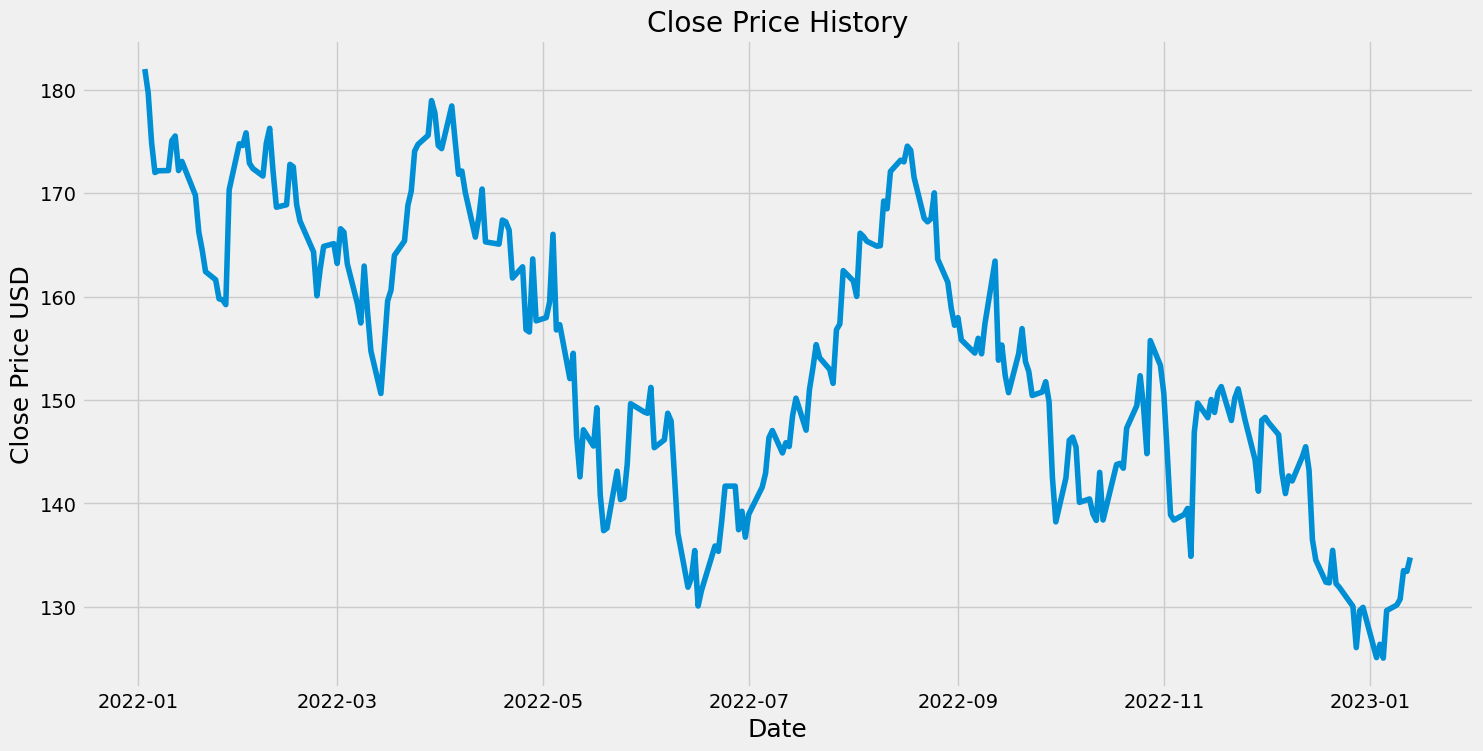

In [44]:
#Visualise the closing price history
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18 )
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [45]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the data frame to numpy array
dataset = data.values
#Get the number of rows to train the model on (training on 80 %)
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

208

In [46]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.00000000e+00],
       [9.59466614e-01],
       [8.75592269e-01],
       [8.24355240e-01],
       [8.27338187e-01],
       [8.27689201e-01],
       [8.78399843e-01],
       [8.86295912e-01],
       [8.27689201e-01],
       [8.43130593e-01],
       [7.85752028e-01],
       [7.23109328e-01],
       [6.92928572e-01],
       [6.56080162e-01],
       [6.42217930e-01],
       [6.09931627e-01],
       [6.08352467e-01],
       [6.00105384e-01],
       [7.95051884e-01],
       [8.73135708e-01],
       [8.70152761e-01],
       [8.91735420e-01],
       [8.40147378e-01],
       [8.31198535e-01],
       [8.18389345e-01],
       [8.74013109e-01],
       [8.99456116e-01],
       [8.26460787e-01],
       [7.65397515e-01],
       [7.69608877e-01],
       [8.38217204e-01],
       [8.34006110e-01],
       [7.69608877e-01],
       [7.41884681e-01],
       [6.89594879e-01],
       [6.15020389e-01],
       [6.61870684e-01],
       [6.98894735e-01],
       [7.03632216e-01],
       [6.69942126e-01],


In [47]:
#Create the training data set
#Create the sceled training data set

train_data = scaled_data[0: training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([1.        , 0.95946661, 0.87559227, 0.82435524, 0.82733819,
       0.8276892 , 0.87839984, 0.88629591, 0.8276892 , 0.84313059,
       0.78575203, 0.72310933, 0.69292857, 0.65608016, 0.64221793,
       0.60993163, 0.60835247, 0.60010538, 0.79505188, 0.87313571,
       0.87015276, 0.89173542, 0.84014738, 0.83119854, 0.81838934,
       0.87401311, 0.89945612, 0.82646079, 0.76539752, 0.76960888,
       0.8382172 , 0.83400611, 0.76960888, 0.74188468, 0.68959488,
       0.61502039, 0.66187068, 0.69889474, 0.70363222, 0.66994213,
       0.72889985, 0.72310933, 0.66941574, 0.60150917, 0.56887185,
       0.66555539, 0.58782258, 0.52131953, 0.4492016 , 0.52763644,
       0.60659767, 0.62467099, 0.68362872, 0.70819459, 0.7685561 ,
       0.79294634, 0.86067753, 0.87208293, 0.88752433, 0.94648205])]
[0.9256011511965592]

[array([1.        , 0.95946661, 0.87559227, 0.82435524, 0.82733819,
       0.8276892 , 0.87839984, 0.88629591, 0.8276892 , 0.84313059,
       0.78575203, 0.72310933, 0.692

In [48]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [49]:
#Reshape the data - LST input is 3dimension while the x_train is 2 dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape   

(148, 60, 1)

In [50]:
#Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [51]:
#Compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [52]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs = 1)


148/148 [==============================] - 6s 23ms/step - loss: 0.0279


In [53]:
#Create the testing data set
#Create a new array containing scawled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [54]:
#Convert the data in numpy array
x_test = np.array(x_test)

In [55]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [56]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 13ms/step


In [57]:
#Get the root mean square error (RSME) 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


5.624978417470445

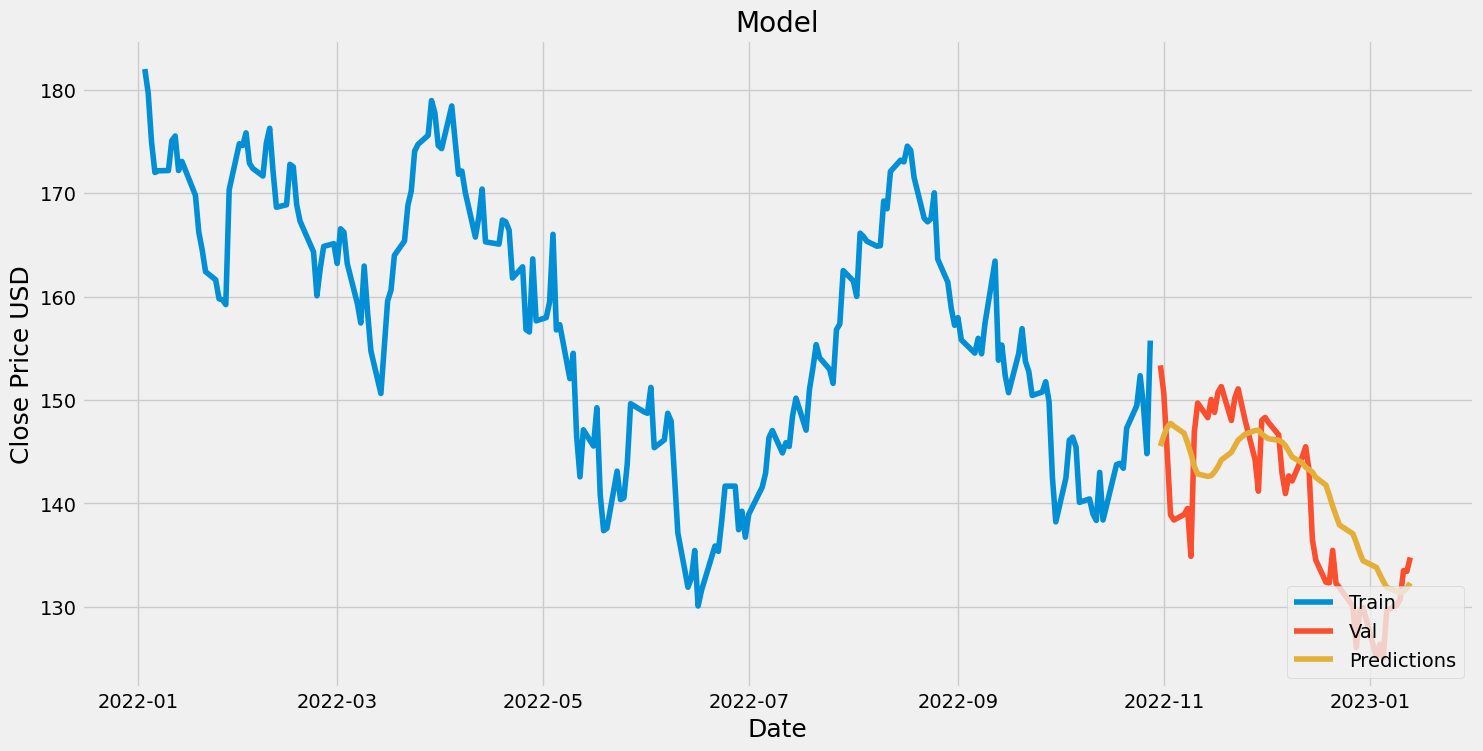

In [58]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [59]:
#Show thw valid and predicted prices
valid

,Close,Predictions
Date,,
2022-10-31 00:00:00-04:00,153.339996,145.528687
2022-11-01 00:00:00-04:00,150.649994,146.532303
2022-11-02 00:00:00-04:00,145.029999,147.356064
2022-11-03 00:00:00-04:00,138.880005,147.728806
2022-11-04 00:00:00-04:00,138.380005,147.468765
2022-11-07 00:00:00-05:00,138.919998,146.769196
2022-11-08 00:00:00-05:00,139.500000,145.831177
2022-11-09 00:00:00-05:00,134.869995,144.810104
2022-11-10 00:00:00-05:00,146.869995,143.573639


In [75]:
#Get the quote
apple_quote = pdr.get_data_yahoo('AAPL',start= '2022-01-01', end='2023-01-11')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 day closing price values 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 21ms/step
[[131.46086]]


In [76]:
#Get the quote
apple_quote2 = pdr.get_data_yahoo('AAPL',start= '2023-01-11', end='2023-01-12')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-01-11 00:00:00-05:00    133.490005
Name: Close, dtype: float64
